# Modeling

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score ,roc_curve,auc,f1_score, precision_recall_curve

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm 

In [2]:
df = pd.read_csv('winequality-red-scaled2.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol_low,alcohol_medium,alcohol_high
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.395722,0.792177,-0.730657,-0.193403
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.395722,0.792177,-0.730657,-0.193403
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.395722,0.792177,-0.730657,-0.193403
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.395722,0.792177,-0.730657,-0.193403
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.395722,0.792177,-0.730657,-0.193403


In [4]:
df['alcohol_high'].value_counts()

-0.193403    1310
 5.170560      49
Name: alcohol_high, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  quality               1359 non-null   float64
 11  alcohol_low           1359 non-null   float64
 12  alcohol_medium        1359 non-null   float64
 13  alcohol_high          1359 non-null   float64
dtypes: float64(14)
memory usage: 148.8 KB


In [7]:
def outlier(df,columns):
    for i in tqdm(columns[0:len(columns)-1]):
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
num_col = df.columns       
outlier(df,num_col)

<ipython-input-7-a272f75c5687>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(columns[0:len(columns)-1]):


fixed acidity -2.5113568505005333 2.326375747532537 -1.7914561662694215 2.8400968757998633
volatile acidity -2.811906473654063 2.653650643942922 -1.8007784068986208 2.7312615550128023
citric acid -3.5419847532319633 3.415797217171748 -1.393257968254347 2.2094406078914615
residual sugar -1.23788992167308 0.8333976934580256 -0.8310298544151842 4.2732146257293255
chlorides -1.005367399568882 0.6964605008913195 -0.934457903716374 5.678764278048144
free sulfur dioxide -2.86240400641101 2.4998210890696915 -1.2345856738543688 3.265853245566935
total sulfur dioxide -2.5848691581931673 2.325802769161439 -1.1625708865508269 2.9647889821477067
density -2.376018576289688 2.377145037845468 -2.588947459814789 2.5109615810362254
pH -2.482826458787042 2.421055512229082 -2.3860393146222503 2.5449430567600224
sulphates -2.2197881379700317 2.00050933461559 -1.3405594978480275 3.64173612951
quality -0.39572180212979297 -0.39572180212979297 -0.39572180212979297 2.5270278125136243
alcohol_low -4.34412506873

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol_low,alcohol_medium,alcohol_high
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,0,0.792177,-0.730657,-0.193403
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,0,0.792177,-0.730657,-0.193403
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,0,0.792177,-0.730657,-0.193403
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,0,0.792177,-0.730657,-0.193403
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,0,0.792177,-0.730657,-0.193403


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['quality'] = labelencoder_y.fit_transform(df['quality'])

# Train Test Split

In [9]:
X = df.drop('quality', axis = 1).values
y = df['quality'].values.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1087, 13)
Shape of X_test:  (272, 13)
Shape of y_train:  (1087, 1)
Shape of y_test (272, 1)


In [11]:
pd.DataFrame(y_train).value_counts()

0    937
1    150
dtype: int64

# SMOTE for Balancing Data

In [12]:
oversample = SMOTE(sampling_strategy=0.3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [13]:
from collections import Counter
print(Counter(y_train))

Counter({0: 937, 1: 281})


# 1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2',solver='liblinear')
classifier_lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [18]:
# Predicting Cross Validation Score

cv_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.8292778756266088
Training set:  0.8382594417077176
Test set:  0.8897058823529411


In [19]:
confusion_matrix(y_test, y_pred_lr_test)

array([[220,  18],
       [ 12,  22]], dtype=int64)

# 2. Random Forest Classification

In [20]:
# Fitting Random Forest Classification to the Training se
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=42)
classifier_rf.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=42)

In [21]:
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.894147134534616
Training set:  1.0
Test set:  0.9080882352941176


In [22]:
confusion_matrix(y_test, y_pred_rf_test)

array([[230,   8],
       [ 17,  17]], dtype=int64)

In [23]:
print("Training set accuracy : {}\nConfusion matrix :\n {}\nFull Report :\n{}\nroc_auc_score : {}".format(accuracy_score(y_pred_rf_test,y_test),confusion_matrix(y_pred_rf_test,y_test),classification_report(y_pred_rf_test,y_test),roc_auc_score(y_pred_rf_test,y_test)))

Training set accuracy : 0.9080882352941176
Confusion matrix :
 [[230  17]
 [  8  17]]
Full Report :
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       247
           1       0.50      0.68      0.58        25

    accuracy                           0.91       272
   macro avg       0.73      0.81      0.76       272
weighted avg       0.92      0.91      0.91       272

roc_auc_score : 0.8055870445344131


# 3. Xgboost Classifier

In [24]:
# ! pip3 install xgboost

In [25]:
import xgboost as xgb

In [26]:
wine_dmatrix = xgb.DMatrix(data=X_train,label=y_train.ravel())

In [27]:
import decimal

def float_range(start, stop, step):
  while start <= stop:
    yield float(start)
    start += decimal.Decimal(step)

In [28]:
gbm_param_grid = {'learning_rate': [0.05,0.1,0.15,0.20,0.25],
'max_depth': [3,4,5,6,8,10,12,15],
'min_child_weight':[1,3,5,7],
'gamma':[0.0,0.1,0.2,0.3,0.4],
'colsample_bytree':[0.3,0.4,0.5,0.7],
'n_estimators':[100,200,300]}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
gbm = xgb.XGBClassifier(use_label_encoder=False)

In [30]:
grid_mse = RandomizedSearchCV(gbm,param_distributions=gbm_param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1, cv=5, verbose=3)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    6.1s remaining:    1.9s


[04:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters found:  {'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.5}
Lowest RMSE found:  0.9244221213201498


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.7s finished


In [31]:
gbm_best = xgb.XGBClassifier(**grid_mse.best_params_)

In [32]:
gbm_best.fit(X_train,y_train)

C:\Users\Anshu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_xgb = gbm_best.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.87%


In [35]:
confusion_matrix(y_test, y_pred_xgb)

array([[221,  17],
       [ 16,  18]], dtype=int64)

In [36]:
print("Training set accuracy : {}\nConfusion matrix :\n {}\nFull Report :\n{}\nroc_auc_score : {}".format(accuracy_score(y_pred_xgb,y_test),confusion_matrix(y_pred_xgb,y_test),classification_report(y_pred_xgb,y_test),roc_auc_score(y_pred_xgb,y_test)))

Training set accuracy : 0.8786764705882353
Confusion matrix :
 [[221  16]
 [ 17  18]]
Full Report :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       237
           1       0.53      0.51      0.52        35

    accuracy                           0.88       272
   macro avg       0.73      0.72      0.73       272
weighted avg       0.88      0.88      0.88       272

roc_auc_score : 0.7233875828812538


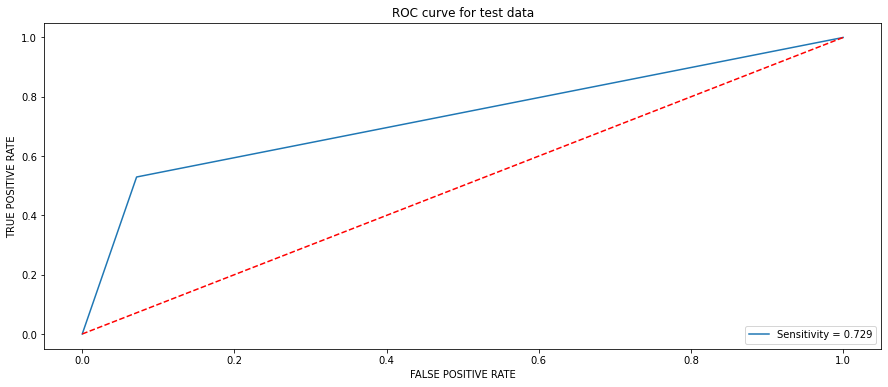

In [40]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_xgb)
roc_auc = roc_auc_score(y_test,y_pred_xgb)
plt.figure(figsize  = (15,6))
plt.plot(fpr, tpr, label = 'Sensitivity = %0.3f'% roc_auc )
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC curve for test data')
plt.legend(loc="lower right")
plt.show()

No Skill: ROC AUC=0.500
XGBOOST: ROC AUC=0.868


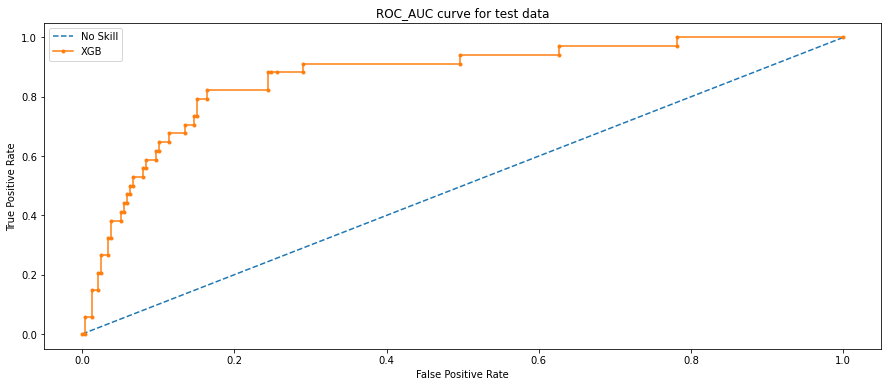

In [38]:
########### ROC  AUC curve   ######
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = gbm_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBOOST: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.figure(figsize = (15,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("ROC_AUC curve for test data")
plt.show()  

XGBOOST: f1=0.522 auc=0.456


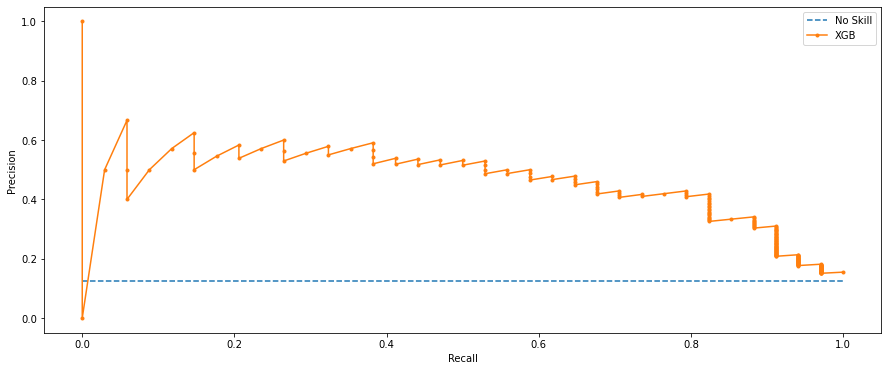

In [39]:
# Precision Recall curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred_xgb), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
# summarize scores
print('XGBOOST: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
plt.figure(figsize=(15,6))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()